# **Machine Learning-based Network Intrusion Detection System**

### **Data Acquisition**

For this project, the dataset used is the CIC-IDS-2017 dataset, provided by the Canadian Insitute for Cybersecurity (CIC). This dataset is recognized for its realistic network traffic interpretation, including both benign and malicious activities. It contains an elaborate compilation of resources necessary for training and evaluating network intrusion detection systems (NIDS). The dataset is free for academic and research purposes at [CIC-IDS Dataset Portal](https://www.unb.ca/cic/datasets/ids-2017.html) and can be downloaded from its direct repository at [CIC Dataset Repository](http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/).
  
**Dataset Directory Structure**
  
After downloading, the dataset is organized into the following key directories:
  
1. **PCAPs folder**:
    This folder contains the raw network traffic capture files in `.pcap` format for different days of the week:

    * `Monday-WorkingHours.pcap`
    * `Tuesday-WorkingHours.pcap`
    * `Thursday-WorkingHours.pcap`
    * `Wednesday-workingHours.pcap`
    * `Wednesday-workingHours.pcap`
    * `Friday-WorkingHours.pcap`

2. **CSVs folder**:
    This folder contains processed datasets derived from the raw `.pcap` files:

    * **MachineLearningCSV.zip**: After extraction, this folder contains labeled network flow data in `.csv` format, specifically designed for machine learning tasks. It includes eight files:

        * `Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv`
        * `Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv`
        * `Friday-WorkingHours-Morning.pcap_ISCX.csv`
        * `Monday-WorkingHours.pcap_ISCX.csv`
        * `Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv`
        * `Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv`
        * `Tuesday-WorkingHours.pcap_ISCX.csv`
        * `Wednesday-workingHours.pcap_ISCX.csv`

    * **GeneratedLabeledFlows.zip**: After extraction, this folder contains labeled flows generated using CICFlowMeter in `.csv` format, with similar filenames as the `MachineLearningCSV` directory.



#### **Steps for Data Preparation**
  
1. **Downloading the Dataset**: The dataset was downloaded from the **CSVs** directory at the repository:
    * Files Downloaded: `MachineLearningCSV.zip` and `GeneratedLabelledFlows.zip`
    
2. **Extraction of Data**: Both `.zip` files were extracted locally:
    * The **MachineLearningCSV** folder provides pre-processed labeled datasets for machine learning tasks.
    * The **GeneratedLabelledFlows** folder contains detailed traffic labeling data.
  
3. **Choosing Data for the Project**: The **MachineLearningCSV** folder is used for experimentation of this project. It offers pre-labeled `.csv` files that simplify preprocessing and allow for direct feature extraction and model training.

### **Importing libraries and Loading Dataset**

In [53]:
# Data Manipulation and Analysis
import os
import glob
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Miscellaneous
import warnings
from scipy import stats
import joblib

warnings.filterwarnings('ignore')

In [54]:
ml_files_path = "CIC-IDS-2017-dataset/MachineLearningCSV/MachineLearningCVE"
ml_csv_files = glob.glob(ml_files_path + "/*.csv")

# Concatenate all CSV files
pcap_csv_df = pd.concat((pd.read_csv(i) for i in ml_csv_files))

pcap_csv_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [55]:
print(f"The shape of the dataset is {pcap_csv_df.shape}")
print(f"The number of columns in the dataset is {len(pcap_csv_df.columns)}")
print("The columns in the dataset are ", pcap_csv_df.columns)

The shape of the dataset is (2830743, 79)
The number of columns in the dataset is 79
The columns in the dataset are  Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min P

In [56]:
pd.options.display.max_rows = 100

The column names have trailing spaces so trimming the column names enhances readability.

In [57]:
# Strip column names
pcap_csv_df.columns = pcap_csv_df.columns.str.strip()

In [58]:
pcap_csv_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [59]:
pcap_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [60]:
pcap_csv_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [61]:
pcap_csv_df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692702,53,94939,4,2,188,226,47,47,47.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### **Data Cleaning and Preprocessing**

#### **Treating duplicate values**

In [62]:
# Remove duplicate rows
duplicate_rows = pcap_csv_df[pcap_csv_df.duplicated()]
print(f"There are {len(duplicate_rows)} duplicate rows in the dataset")
pcap_csv_df.drop_duplicates(inplace=True)

There are 308381 duplicate rows in the dataset


#### **Treating missing values**

In [63]:
# Handle infinite values
pcap_csv_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values
missing_values = pcap_csv_df.isna().sum()

if missing_values.any():
    print("Columns with missing values before filling: ")
    print(missing_values[missing_values > 0])

    for i in missing_values[missing_values > 0].index:
        median_value = pcap_csv_df[i].median()
        pcap_csv_df[i].fillna(median_value, inplace=True)

    print("\nMissing values after filling with respective medians: ")
    print(pcap_csv_df.isna().sum())
else:
    print("No missing values found")

Columns with missing values before filling: 
Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64

Missing values after filling with respective medians: 
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total  

Filling in the missing values with median will not introduce any bias and the missing values in the numeric columns are 0.06% of the original dataset. 

In [64]:
print(f"The presence of NA values in the dataset is ", pcap_csv_df.isna().any().any())
print(f"The presence of null values in the dataset is ", pcap_csv_df.isnull().any().any())

The presence of NA values in the dataset is  False
The presence of null values in the dataset is  False


In [65]:
print(f"The shape of the dataset after cleaning is ", pcap_csv_df.shape)

The shape of the dataset after cleaning is  (2522362, 79)


In [66]:
pcap_csv_df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [67]:
pcap_csv_df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [68]:
pcap_csv_df = pcap_csv_df.applymap(lambda x: x.replace(" � ","-") if isinstance(x, str) else x)

In [69]:
pcap_csv_df['Label'].value_counts()

Label
BENIGN                      2096484
DoS Hulk                     172849
DDoS                         128016
PortScan                      90819
DoS GoldenEye                 10286
FTP-Patator                    5933
DoS slowloris                  5385
DoS Slowhttptest               5228
SSH-Patator                    3219
Bot                            1953
Web Attack-Brute Force         1470
Web Attack-XSS                  652
Infiltration                     36
Web Attack-Sql Injection         21
Heartbleed                       11
Name: count, dtype: int64

### **Preparing the Target Class (Attack Labels)**

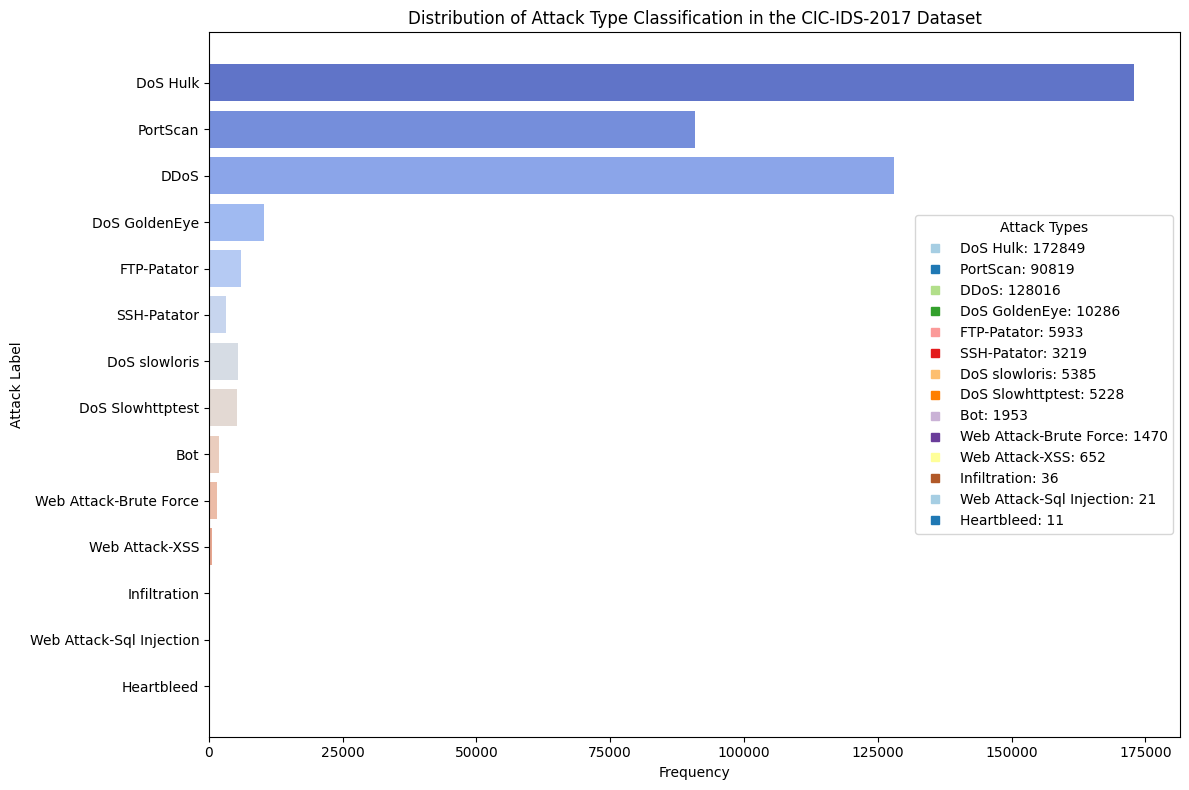

In [70]:
# List of attack labels
attack_labels = ['DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 
                 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
                 'DoS Slowhttptest','Bot','Web Attack-Brute Force',
                 'Web Attack-XSS', 'Infiltration', 'Web Attack-Sql Injection','Heartbleed']

# Creating a new DataFrame for the filtered attack labels
attack_df = pcap_csv_df[pcap_csv_df['Label'].isin(attack_labels)]

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the countplot using seaborn
ax = sns.countplot(data=attack_df, y='Label', order=attack_labels, palette='coolwarm')

# Calculate counts
counts = attack_df['Label'].value_counts().loc[attack_labels]

# Create color palette for the legend manually
colors = sns.color_palette('Paired', len(attack_labels))

# Add a custom legend with attack types and their respective counts
for label, count, color in zip(counts.index, counts.values, colors):
    ax.plot([], [], 's', label=f'{label}: {count}', color=color)

# Customizing the plot
plt.title("Distribution of Attack Type Classification in the CIC-IDS-2017 Dataset")
plt.xlabel("Frequency")
plt.ylabel("Attack Label")

# Display the legend
plt.legend(title='Attack Types', loc='upper right', bbox_to_anchor=(1, 0.75))

# Showing the plot
plt.tight_layout()
plt.show()

Grouping similar attack types will be efficient to classify the intrusion types and achieve better accuracy.

### **Grouping Attack Types**

In [71]:
attack_group = {'BENIGN': 'BENIGN', 
                'DoS Hulk': 'dos',
                'PortScan': 'portscan', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Web Attack-Brute Force': 'web_attack', 
                'Web Attack-XSS': 'web_attack',
                'Infiltration': 'infiltration',
                'Web Attack-Sql Injection': 'web_attack',
                'Heartbleed': 'heartbleed'
}

# Creating generalized label
pcap_csv_df['AttackType_Label'] = pcap_csv_df['Label'].map(lambda x: attack_group[x])
pcap_csv_df['AttackType_Label'].value_counts()

AttackType_Label
BENIGN          2096484
dos              193748
ddos             128016
portscan          90819
brute_force        9152
web_attack         2143
botnet             1953
infiltration         36
heartbleed           11
Name: count, dtype: int64

In [72]:
pcap_csv_df.drop('Label', axis = 1, inplace = True)

### **Label Encoding**

In [73]:
label_encoder = LabelEncoder()
pcap_csv_df['Label_Number'] = label_encoder.fit_transform(pcap_csv_df['AttackType_Label'])

pcap_csv_df['Label_Number'].unique()

for i in sorted(pcap_csv_df['Label_Number'].unique()):
    print(f"{i} - {label_encoder.inverse_transform([i])[0]}")

0 - BENIGN
1 - botnet
2 - brute_force
3 - ddos
4 - dos
5 - heartbleed
6 - infiltration
7 - portscan
8 - web_attack


Label encoding is done to convert categorical variables into numerical format. Other way is one hot encoding. Label encoding is more suitable to this use case.

### **Correlation among features**

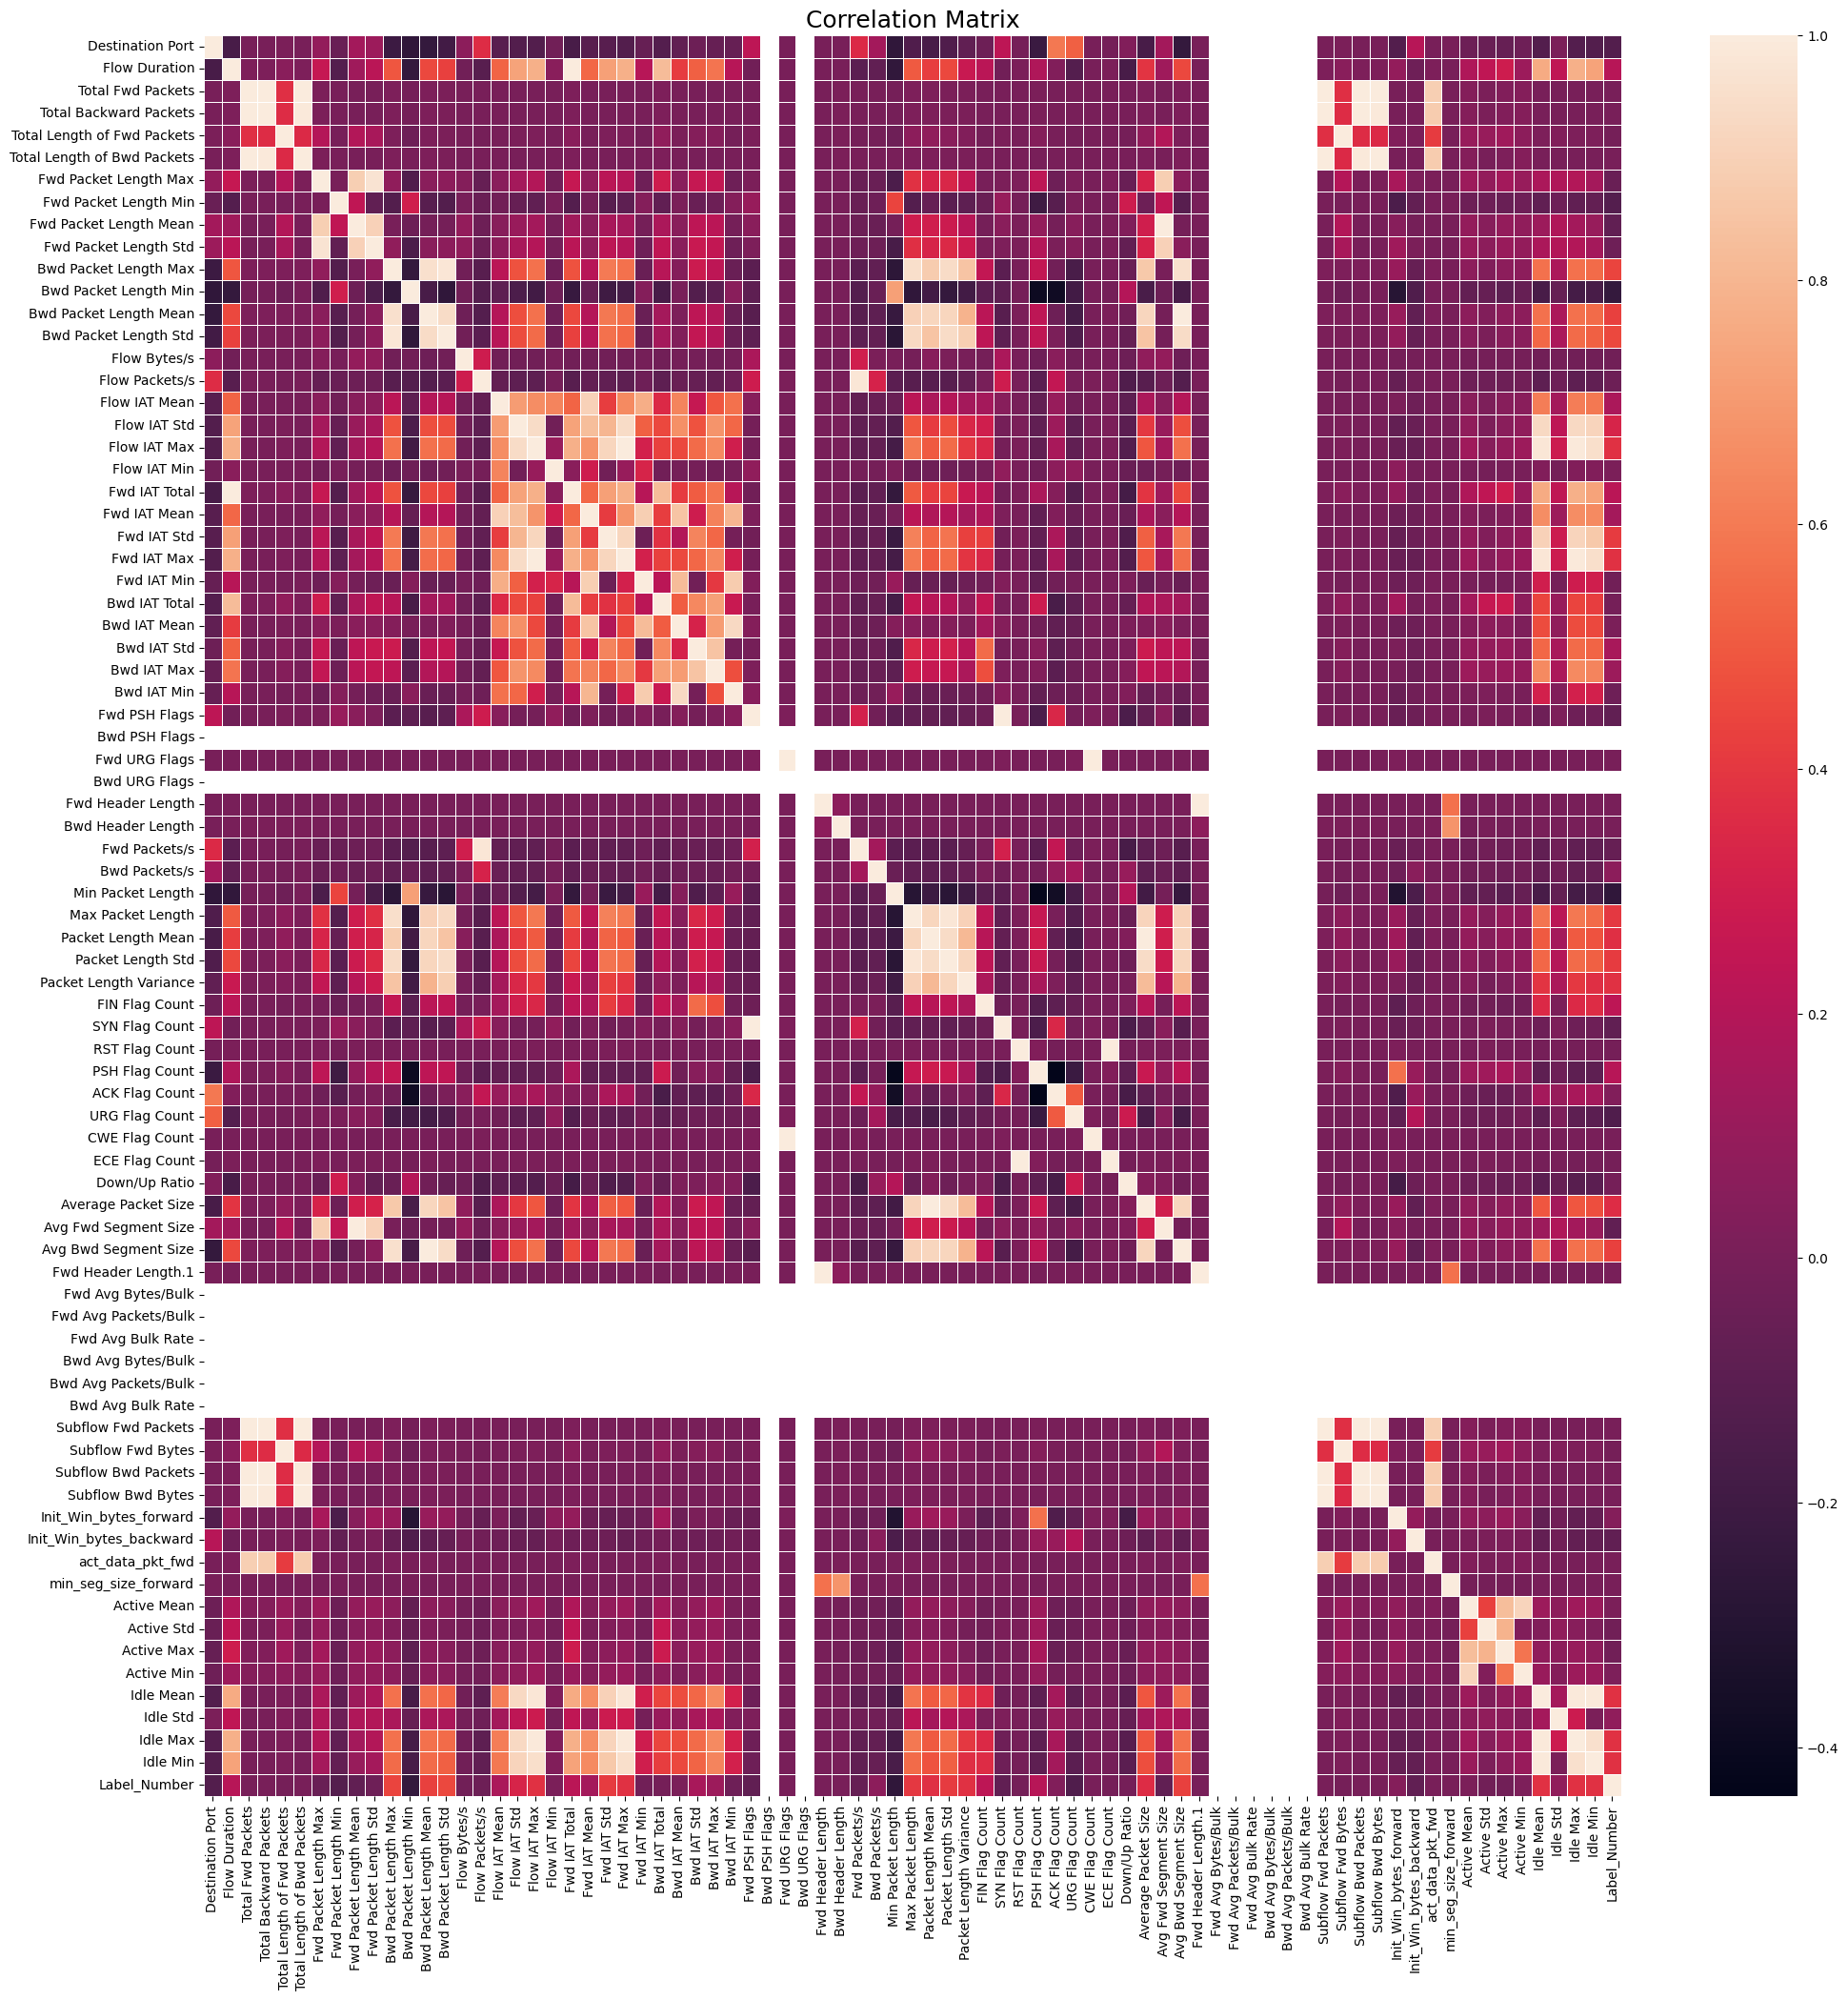

In [74]:
corr = pcap_csv_df.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

Features which are highly correlated impact the model adversely by causing overfitting.

In [75]:
positive_correlation_features = corr['Label_Number'][(corr['Label_Number'] > 0) & (corr['Label_Number'] < 1)].index.tolist()

print("Positive Correlation Features associated with 'Label_Number' are as follows: ")
for i, pos_cor in enumerate(positive_correlation_features, start = 1):
    val = corr.loc[pos_cor, 'Label_Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', pos_cor, val))

Positive Correlation Features associated with 'Label_Number' are as follows: 
1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Me

In [76]:
print(f"The number of important features are {len(positive_correlation_features)}")

The number of important features are 32


### **Enhanced Dataset Sampling with Stratified Sampling**

Since the dataset is enormous, it is very expensive in terms of computational time and resources. I took a sample of 25% of the original dataset and verified that the sample is part of the original dataset population.

Columns with >5% difference in means:
Fwd URG Flags          10.000071
Fwd Header Length      33.499670
Bwd Header Length      53.717512
CWE Flag Count         10.000071
Fwd Header Length.1    33.499670
dtype: float64


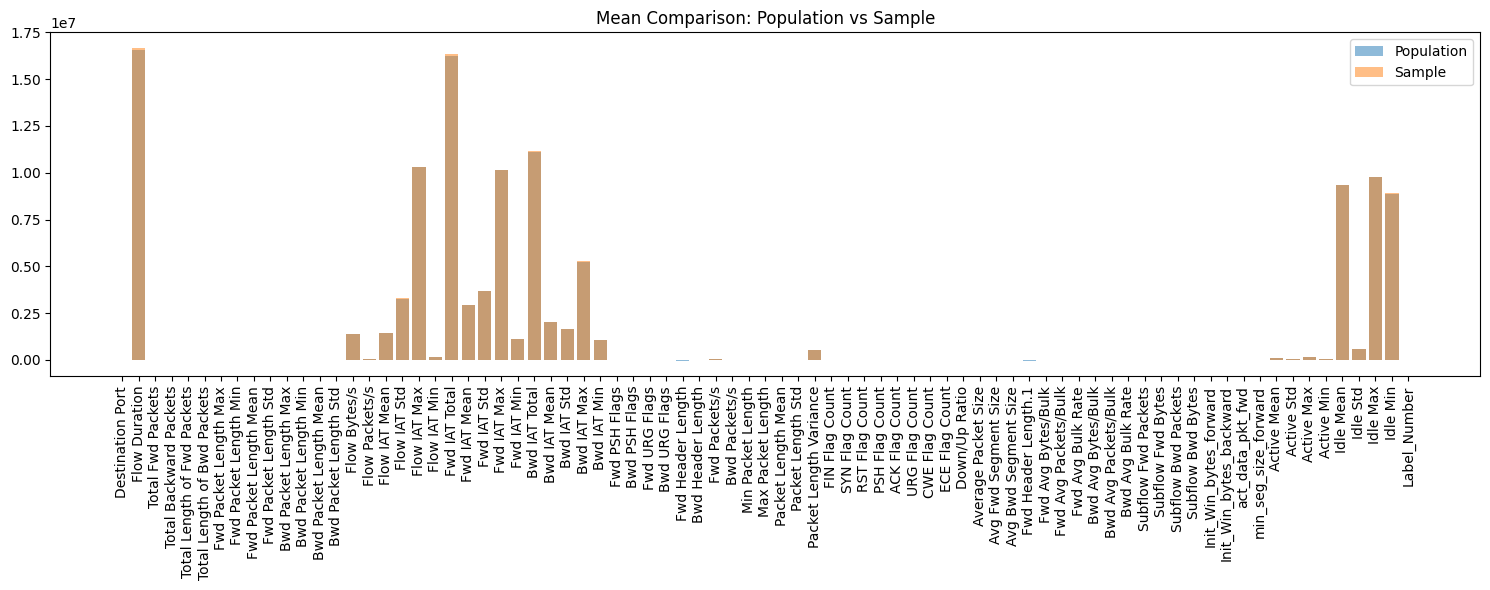

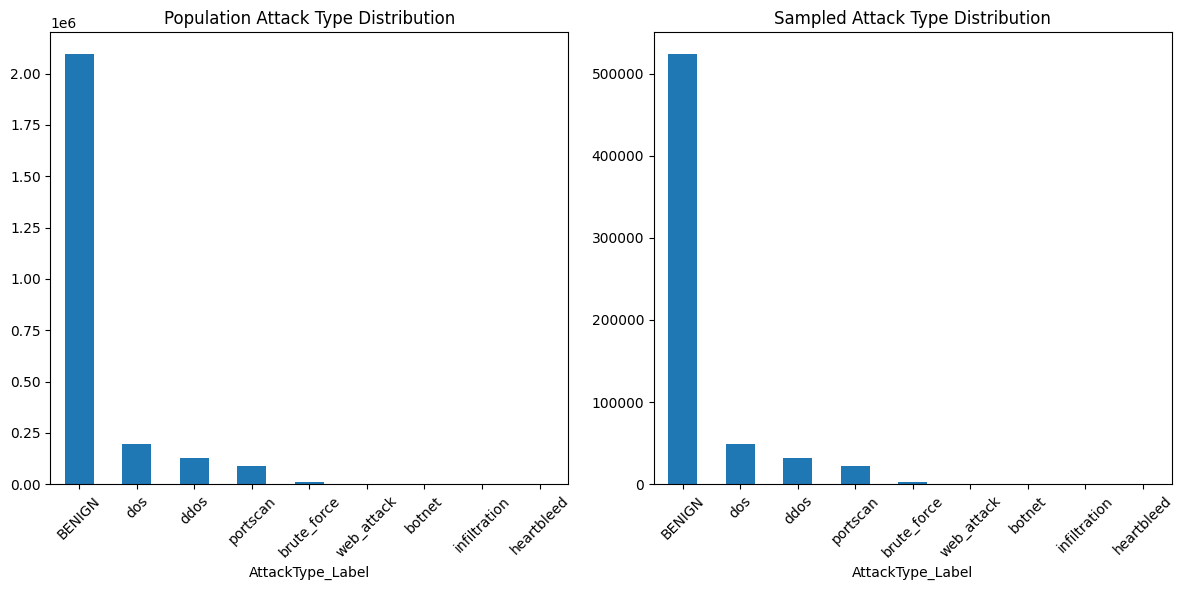

Population Distribution:
AttackType_Label
BENIGN          2096484
dos              193748
ddos             128016
portscan          90819
brute_force        9152
web_attack         2143
botnet             1953
infiltration         36
heartbleed           11
Name: count, dtype: int64


Sample Distribution:
AttackType_Label
BENIGN          524121
dos              48437
ddos             32004
portscan         22705
brute_force       2288
web_attack         536
botnet             488
infiltration         9
heartbleed           3
Name: count, dtype: int64



Chi-square Test Results:
Chi-square statistic: 3.643293016690411e-08
Degrees of freedom: 8
p-value: 1.0


Population size: 2522362

Sample shape: (630591, 80)


In [77]:
def sample_dataset(df, sample_percentage=0.25, stratify_column='AttackType_Label'):
    
    np.random.seed(42)
    # Stratify the sample by attack type label
    sample = df.groupby(stratify_column, group_keys=False).apply(lambda x: x.sample(frac=sample_percentage))
    return sample

# Taking a sample of the dataset
sampled_df = sample_dataset(pcap_csv_df)

# Detailed representativeness check
def compare_population_sample_stats(population_df, sample_df, numeric_columns):
    population_means = population_df[numeric_columns].mean()
    sample_means = sample_df[numeric_columns].mean()
    
    # Calculating the percentage difference
    pct_difference = np.abs((population_means - sample_means) / population_means * 100)
    
    # Identifying the columns with significant difference (>5%)
    significant_diff_columns = pct_difference[pct_difference > 5]
    
    print("Columns with >5% difference in means:")
    print(significant_diff_columns)
    
    # Visualizing the mean comparisons
    plt.figure(figsize=(15, 6))
    plt.bar(population_means.index, population_means.values, alpha=0.5, label='Population')
    plt.bar(sample_means.index, sample_means.values, alpha=0.5, label='Sample')
    plt.title('Mean Comparison: Population vs Sample')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return significant_diff_columns

# Selecting the numeric columns for comparison
numeric_columns = sampled_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Comparing the population and sample statistics
significant_diff = compare_population_sample_stats(pcap_csv_df, sampled_df, numeric_columns)

# Visualization of attack type distributions
plt.figure(figsize=(12, 6))

# Population distribution
plt.subplot(1, 2, 1)
population_dist = pcap_csv_df['AttackType_Label'].value_counts()
population_dist.plot(kind='bar')
plt.title('Population Attack Type Distribution')
plt.xticks(rotation=45)

# Sample distribution
plt.subplot(1, 2, 2)
sample_dist = sampled_df['AttackType_Label'].value_counts()
sample_dist.plot(kind='bar')
plt.title('Sampled Attack Type Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Displaying the distribution details
print("Population Distribution:")
print(population_dist)
print("\n")
print("Sample Distribution:")
print(sample_dist)
print("\n")

# Manual chi-square test with normalized frequencies
def custom_chi_square_test(population_counts, sample_counts):
    # Normalizing the frequencies
    population_normalized = population_counts / population_counts.sum()
    sample_normalized = sample_counts / sample_counts.sum()
    
    # Calculating the chi-square statistic
    chi2 = np.sum((sample_normalized - population_normalized)**2 / population_normalized)
    
    # Calculating the Degrees of freedom
    df = len(population_counts) - 1
    
    # Calculating the p-value
    p_value = 1 - stats.chi2.cdf(chi2, df)
    
    print("\nChi-square Test Results:")
    print(f"Chi-square statistic: {chi2}")
    print(f"Degrees of freedom: {df}")
    print(f"p-value: {p_value}")
    print("\n")
    return chi2, p_value

# Performing a custom chi-square test
custom_chi_square_test(population_dist, sample_dist)

# Displaying sample size details
print(f"Population size: {len(pcap_csv_df)}\n")
print(f"Sample shape: {sampled_df.shape}")

The chi square test results shows that chi-square statistic is **3.643e-08** which is extremely small. There are **8** degrees of freedom. The p-value is **1.0** which indicates that there is no significant difference between the observed distribution in the sample and the expected distribution in the population. This suggests that the sample is representative of the population, and any observed differences are due to random variation rather than any systemic bias.


* The population and sample distributions are fairly consistent across attack types, with **BENIGN** being overwhelmingly the most common category.
* The chi-square test results show that the sample distribution does not significantly differ from the population distribution, with a very high p-value of **1.0**.
* Based on the chi-square test, there is no indication of bias or discrepancies between the sample and the population, meaning the sample is a good representation of the population.

`stratify=y` means that the target `y` will be evenly distributed in each split.

### **Enhanced Feature Selection and Scaling**

In [78]:
sampled_df.drop('Label_Number', axis = 1, inplace = True)
pcap_csv_df.drop('Label_Number', axis = 1, inplace = True)

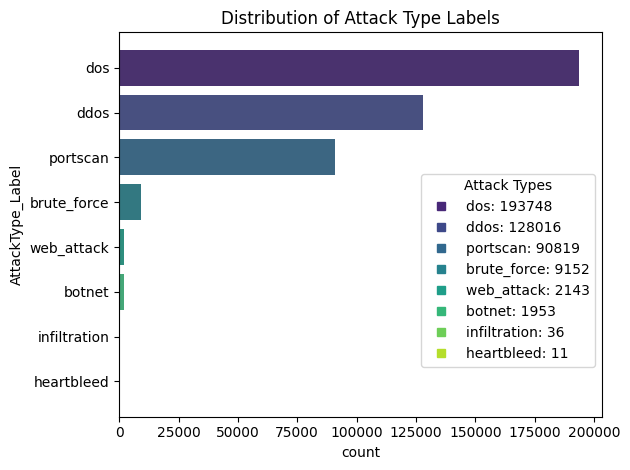

In [79]:
# Filtering out benign samples
grouped_attacks = pcap_csv_df.loc[pcap_csv_df['AttackType_Label'] != 'BENIGN']

# Calculating the counts for each 'AttackType_Label' and sort them in descending order
attack_counts = grouped_attacks['AttackType_Label'].value_counts()

# Creating count plot
sns.countplot(data=grouped_attacks, y='AttackType_Label', palette='viridis', order = grouped_attacks['AttackType_Label'].value_counts().index)

# Adding a title to the plot
plt.title('Distribution of Attack Type Labels', fontsize=12)

# Adding count to the legend
for label, count in attack_counts.items():
    plt.plot([], [], 's', label=f'{label}: {count}', color=sns.color_palette('viridis', len(attack_counts))[list(attack_counts.index).index(label)])

# Displaying the legend
plt.legend(title='Attack Types', loc='upper right', bbox_to_anchor=(1, 0.65))

# Displaying the plot
plt.tight_layout() 
plt.show()

In [80]:
single_valued_columns = [i for i in pcap_csv_df.columns if pcap_csv_df[i].nunique() == 1]
multi_valued_columns = pcap_csv_df.nunique()[pcap_csv_df.nunique() > 1].index

pcap_csv_df = pcap_csv_df[multi_valued_columns]

# Display the dropped columns
print('Dropped columns:')
single_valued_columns

Dropped columns:


['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

Single valued columns have same value in all rows which means that the columns have zero standard deviation and doesnot have variance. There is no relationship among those columns. Removal of those columns results in columns being able to distinguish the classes from groups of data.

Outliers are not removed from this dataset because the CIC-IDS-2017 dataset is based on real-time network traffic collected under realistic conditions, including both benign and malicious activities. The presence of outliers in this dataset is an important aspect, as they often represent rare but significant network events such as attacks (e.g., DDoS, port scanning, or brute force attempts). In the context of intrusion detection systems (IDS), outliers may signify anomalous behavior that could indicate a security breach or a potential threat. Additionally, the occurrence of these outliers is consistent with real-world network environments, where malicious activities often appear sporadically or infrequently.

In [81]:
features = pcap_csv_df.drop("AttackType_Label", axis = 1)
attack_type_labels = pcap_csv_df['AttackType_Label']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [82]:
feature_size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = feature_size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'Percentage of information preserved: {sum(ipca.explained_variance_ratio_):.2%}')

Percentage of information preserved: 99.23%


In [83]:
ipca_transformed_features = ipca.transform(scaled_features)
ipca_transformed_data = pd.DataFrame(ipca_transformed_features, columns = [f'PC{i+1}' for i in range(feature_size)])
ipca_transformed_data['AttackType_Label'] = attack_type_labels.values

In [84]:
ipca_transformed_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,AttackType_Label
0,-2.311094,-0.052684,0.515874,0.616537,3.840727,0.395336,-0.017878,0.186557,0.370078,-0.680438,...,-0.233945,0.699887,-0.539784,-0.035279,0.023075,0.001733,0.045647,0.151301,0.051935,BENIGN
1,-2.246553,-0.049159,0.467881,0.395550,2.001551,-0.141045,-0.016487,-0.780967,-0.889976,2.660582,...,-0.012903,0.543839,0.785574,0.212940,0.030939,0.001218,0.025860,0.009198,-0.058324,BENIGN
2,-2.258822,-0.049501,0.473634,0.408672,2.081408,-0.132962,-0.016754,-0.769681,-0.877466,2.634068,...,-0.020362,0.539934,0.780933,0.203564,0.034717,0.001194,0.025898,0.005914,-0.064384,BENIGN
3,-2.249188,-0.050635,0.467051,0.346824,2.013841,-0.106530,-0.016178,-0.745133,-0.840229,2.506786,...,-0.027380,0.175826,0.802770,0.063856,0.047573,0.001131,0.009281,0.018965,-0.033301,BENIGN
4,-2.311090,-0.052685,0.515877,0.616515,3.840698,0.395327,-0.017879,0.186543,0.370100,-0.680454,...,-0.233960,0.699809,-0.539762,-0.035319,0.023078,0.001733,0.045645,0.151311,0.051946,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-1.966993,-0.034823,0.214152,-0.550069,-0.715274,-0.255957,-0.028814,-0.395631,0.253441,-0.399620,...,-0.296905,-0.081193,0.269844,-0.117746,-0.025322,-0.000129,0.121039,-0.385284,-0.365042,BENIGN
2522358,-1.967205,-0.034920,0.140546,-0.769750,-1.329699,-1.050008,-0.084008,-0.676149,1.052839,-0.349890,...,0.177611,0.145811,0.015451,-0.222039,-0.507178,-0.003223,0.002393,-0.005697,-0.005829,BENIGN
2522359,-2.177556,-0.044307,0.882352,1.291548,4.455997,0.141248,-0.035232,0.677099,1.469905,-0.910787,...,-0.031176,1.551953,-0.121564,0.613116,0.076038,0.000554,0.116441,-0.021843,-0.250166,BENIGN
2522360,-1.906970,-0.035866,0.236786,-0.648835,-0.915041,-0.480387,-0.047541,-0.496969,0.535691,-0.471521,...,-0.168155,0.066397,0.364400,-0.251553,-0.355645,-0.001837,0.073125,-0.243405,-0.267952,BENIGN


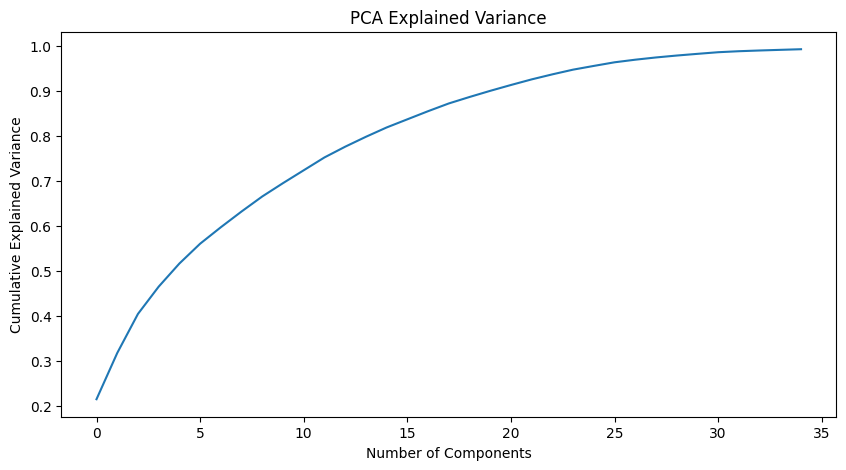

In [85]:
# Visualize explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(ipca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

A straightforward and effective method to reduce the dataset's dimensionality and enhance model performance is by utilizing highly correlated features. In this approach, label encoding is employed for the target feature, where numerical values are arbitrarily assigned to eadch category without any inherent meaning. As a result, a correlation matrix calculated with label-encoded variables may not accurately represent the true relationships between the features.

To address this, a more adaptable feature selection technique is Principal Component Analysis (PCA). PCA transforms the original set of variables into smaller set of uncorrelated variables, known as principal components. This approach uses Incremental Principal Component Analysis which is a variant of PCA that enables the efficient computation of principal components for large datasets that cannot be loaded into memory. Prior to performing incremental PCA, StandardScaler is applied to standardize the data, ensuring consistency.

The cumulative explained variance of a Principal Component Analysis (PCA) is a valuable tool to determine the optimal number of principal components to retain while capturing most of the variance in the original dataset. 

* **Cumulative Explained Variance:** The y-axis represents the proportion of the total variance explained by the first n principal components. As you move along the x-axis (number of components), the cumulative explained variance increases.
* **Elbow Point:** The "elbow point" in the curve is often used as a guideline to determine the optimal number of components. It's the point where the curve starts to level off, indicating that adding more components provides diminishing returns in terms of explained variance.
In this specific plot:

It appears that around 10-15 principal components capture a significant portion of the variance.
Adding more components beyond this point might not significantly improve the explained variance.

### **Machine Learning Model Training**

#### **Support Vector Machine**

In [86]:
# Splitting the dataset into normal traffic (benign) and intrusions (non-benign)
benign_traffic = ipca_transformed_data.loc[ipca_transformed_data['AttackType_Label'] == 'BENIGN']
malicious_traffic = ipca_transformed_data.loc[ipca_transformed_data['AttackType_Label'] != 'BENIGN']

# Balancing the dataset by randomly sampling normal traffic to match the number of malicious instances
benign_traffic_balanced = benign_traffic.sample(n=len(malicious_traffic), replace=False)

# Concatenating the benign and malicious traffic to create a balanced dataset
balanced_dataset = pd.concat([malicious_traffic, benign_traffic_balanced])

# Re-labeling 'BENIGN' as 0 and the rest as 1 for binary classification
balanced_dataset['AttackType_Label'] = balanced_dataset['AttackType_Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Sampling the dataset to create a smaller subset of 15,000 rows for training
binary_classification_data = balanced_dataset.sample(n=15000)

# Printing the class distribution in the sampled binary classification data
print(binary_classification_data['AttackType_Label'].value_counts())

AttackType_Label
1    7556
0    7444
Name: count, dtype: int64


In [87]:
X_binary_classification = binary_classification_data.drop('AttackType_Label', axis = 1)
y_binary_classification = binary_classification_data['AttackType_Label']

X_train_binc, X_test_binc, y_train_binc, y_test_binc = train_test_split(X_binary_classification, y_binary_classification, test_size = 0.25, random_state = 0)

In [88]:
svm_classifier = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm_classifier.fit(X_train_binc, y_train_binc)

cv_svm_classifier = cross_val_score(svm_classifier, X_train_binc, y_train_binc, cv = 5)
print('Support Vector Model\n')
print(f'Cross-validation scores:', ', '.join(map(str, cv_svm_classifier)))
print("\n")
print(f'Mean cross-validation score: {cv_svm_classifier.mean():.2f}\n')

Support Vector Model

Cross-validation scores: 0.9604444444444444, 0.9626666666666667, 0.9608888888888889, 0.9577777777777777, 0.956


Mean cross-validation score: 0.96



#### **Decision Tree**

In [89]:
ipca_transformed_data['AttackType_Label'].value_counts()

AttackType_Label
BENIGN          2096484
dos              193748
ddos             128016
portscan          90819
brute_force        9152
web_attack         2143
botnet             1953
infiltration         36
heartbleed           11
Name: count, dtype: int64

In [90]:
# Getting the counts of each 'Attack Type'
attack_counts = ipca_transformed_data['AttackType_Label'].value_counts()

# Selecting attack types that have more than 1950 occurrences
selected_attack_types = attack_counts[attack_counts > 1950]
selected_labels = selected_attack_types.index

# Filtering the dataset to include only the selected attack types
filtered_data = ipca_transformed_data[ipca_transformed_data['AttackType_Label'].isin(selected_labels)]

# Creating a list to hold the processed DataFrames for each attack type
processed_dfs = []

# Iterating over each selected attack type
for attack_type in selected_labels:
    attack_df = filtered_data[filtered_data['AttackType_Label'] == attack_type]
    
    # If the count is greater than 2500, sample it down to 5000 rows
    if len(attack_df) > 2500:
        attack_df = attack_df.sample(n=5000, random_state=0)

    processed_dfs.append(attack_df)

# Concatenating all the DataFrames into one balanced dataset
balanced_data = pd.concat(processed_dfs, ignore_index=True)

# Printing the class distribution in the concatenated dataset
print(balanced_data['AttackType_Label'].value_counts())

# Defining features (X) and target (y)
X_features = balanced_data.drop('AttackType_Label', axis=1)
y_target = balanced_data['AttackType_Label']

# Using SMOTE to perform oversampling on the minority classes
smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X_features, y_target)

# Creating the final balanced dataset after SMOTE oversampling
final_balanced_data = pd.DataFrame(X_upsampled)
final_balanced_data['AttackType_Label'] = y_upsampled

# Shuffling the final balanced dataset
final_balanced_data = final_balanced_data.sample(frac=1, random_state=0)

# Printing the class distribution in the final balanced dataset
print(final_balanced_data['AttackType_Label'].value_counts())

AttackType_Label
BENIGN         5000
dos            5000
ddos           5000
portscan       5000
brute_force    5000
web_attack     2143
botnet         1953
Name: count, dtype: int64
AttackType_Label
web_attack     5000
dos            5000
brute_force    5000
botnet         5000
BENIGN         5000
ddos           5000
portscan       5000
Name: count, dtype: int64


In [91]:
X = final_balanced_data.drop('AttackType_Label', axis = 1)
y = final_balanced_data['AttackType_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [92]:
decision_tree_classifier = DecisionTreeClassifier(max_depth = 8)
decision_tree_classifier.fit(X_train, y_train)

cv_decision_tree = cross_val_score(decision_tree_classifier, X_train, y_train, cv = 5)
print('Decision Tree Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_decision_tree)))
print(f'\nMean cross-validation score: {cv_decision_tree.mean():.2f}')

Decision Tree Model

Cross-validation scores: 0.9746666666666667, 0.9767619047619047, 0.9739047619047619, 0.9731428571428572, 0.9729523809523809

Mean cross-validation score: 0.97


#### **Random Forest**

In [93]:
randomforest_classifier = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
randomforest_classifier.fit(X_train, y_train)

cv_random_forest = cross_val_score(randomforest_classifier, X_train, y_train, cv = 5)
print("Random Forest Model\n")
print(f'Cross-validation scores:', ', '.join(map(str, cv_random_forest)))
print(f"Mean cross validation scores: {cv_random_forest.mean():.2f}")


Random Forest Model

Cross-validation scores: 0.9796190476190476, 0.981904761904762, 0.9782857142857143, 0.9838095238095238, 0.9801904761904762
Mean cross validation scores: 0.98


#### **KNN and Random Forest Ensemble**

In [94]:
# Initialize individual classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
randomforest_classifier = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)

# Combine them using a voting classifier
voting_clf = VotingClassifier(estimators=[('knn', knn_classifier), ('rf', randomforest_classifier)], voting='soft')

# Fit the voting classifier on training data
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn_rf = voting_clf.predict(X_test)

# Evaluate the ensemble classifier
print("Accuracy:", accuracy_score(y_test, y_pred_knn_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_rf))


Accuracy: 0.984

Classification Report:
               precision    recall  f1-score   support

      BENIGN       0.98      0.94      0.96      1222
      botnet       0.97      1.00      0.99      1233
 brute_force       0.99      0.98      0.99      1193
        ddos       1.00      0.99      0.99      1304
         dos       0.98      0.99      0.99      1227
    portscan       0.98      1.00      0.99      1269
  web_attack       0.98      0.99      0.99      1302

    accuracy                           0.98      8750
   macro avg       0.98      0.98      0.98      8750
weighted avg       0.98      0.98      0.98      8750



In [95]:
cv_knn_rf = cross_val_score(voting_clf, X_train, y_train, cv = 5)
print("KNN and Random Forest Ensemble model\n")
print(f'Cross-validation scores:', ', '.join(map(str, cv_knn_rf)))
print(f"Mean cross validation scores: {cv_knn_rf.mean():.2f}")

KNN and Random Forest Ensemble model

Cross-validation scores: 0.984, 0.9860952380952381, 0.9809523809523809, 0.9836190476190476, 0.9809523809523809
Mean cross validation scores: 0.98


**Data Preprocessing:**

* **Scaling & PCA:** The features are scaled using StandardScaler to standardize the data, ensuring the model is not biased by feature magnitudes. Incremental PCA is used for dimensionality reduction, transforming the data into principal components while preserving most of the variance.
* **Label Encoding & SMOTE:** For binary classification, the dataset is split into benign and malicious traffic, and SMOTE is applied to balance the classes by generating synthetic minority class samples. This helps mitigate class imbalance and prevents model bias.

**Model Descriptions:**

1. **Support Vector Machine (SVM):**
    SVM finds the optimal hyperplane to separate classes. We used RBF and polynomial kernels to map data into higher-dimensional space. The model showed strong performance with a mean cross-validation score of **0.96**.
      
2. **Decision Tree:**
    A Decision Tree splits data into decision rules. After filtering the dataset and applying SMOTE, the model was trained and evaluated with a mean cross-validation score of **0.97**.

3. **Random Forest:**
    Random Forest, an ensemble of decision trees, improves accuracy by reducing overfitting. Trained on the balanced dataset, it achieved a high mean cross-validation score of **0.98**.

4. **KNN & Random Forest Ensemble:**
    A **Voting Classifier** combining KNN and Random Forest was used to improve prediction accuracy. This ensemble model performed excellently with an accuracy of **0.98** and high precision, recall, and F1-scores across all attack types.

**Evaluation:**
    Cross-validation was performed for each model, ensuring robustness. The Voting Classifier outperformed the others, with an accuracy of 0.984, showing that combining models can improve overall performance for network intrusion detection.


### **Machine Learning Model Evaluation**

1. **Classification Report**:
    * **Precision**: The proportion of positive predictions that are actually positive.
    * **Recall**: The proportion of actual positive cases that are correctly identified. 
    * **F1-Score**: The harmonic mean of precision and recall. It provides balanced measure of performance. 

2. **Confusion Matrix**:
    * **True Positives (TP)**: The number of actual positive cases correctly classified as positive.
    * **True Negatives (NP)**: The number of actual negative cases correctly classified as negative.
    * **False Positives (FP)**: The number of actual negative cases incorrectly classified as positive.
    * **False Negatives (FN)**: The number of actual positive cases incorrectly classified as negative.

3. **ROC Curve**:
    * **True Positive Rate (TPR) vs. False Positive Rate (FPR):** The ROC curve plots the true positive rate (sensitivity) against the false positive rate (specificity) for various threshold settings.
    * **AUC (Area under the curve)**: The AUC measures the overall performance of the classifier. An AUC of 0.5 indicates random guessing, while an AUC of 1.0 indicates perfect classification.

4. **Precision-Recall Curve**:
    * **Precision vs. Recall**: The PR curve plots precision against recall for different threshold settings. Precision measures positive predictions that are positive and recall measures the actual positive cases which are identified correctly.

In [96]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap='YlGnBu', figsize=(15, 8)):
    """
    Create a confusion matrix heatmap for a given model's predictions.
    """
    plt.figure(figsize=figsize)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=classes, yticklabels=classes, cbar=True)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_classification_metrics(y_true, y_pred, classes, title='Classification Report'):
    """
    Create a heatmap of precision, recall, and F1-score for each class.
    """
    # Get classification report
    metrics = classification_report(y_true=y_true, y_pred=y_pred, 
                                    target_names=classes, output_dict=True)
    
    # Extract precision, recall, and f1-score
    precision = [metrics[target_name]['precision'] for target_name in classes]
    recall = [metrics[target_name]['recall'] for target_name in classes]
    f1_score = [metrics[target_name]['f1-score'] for target_name in classes]
    
    # Prepare the data for the heatmap
    data = np.array([precision, recall, f1_score])
    rows = ['Precision', 'Recall', 'F1-score']
    
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, cmap='YlGnBu', annot=True, fmt='.2f', 
                xticklabels=classes, yticklabels=rows, 
                cbar_kws={'label': 'Score'})
    
    plt.title(f'{title}', fontsize=14)
    plt.xlabel('Attack Types', fontsize=12)
    plt.ylabel('Metrics', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_svm_roc_and_precision_recall(y_true, y_prob, title='SVM Performance Curves'):
    """
    Plot ROC and Precision-Recall curves specifically for SVM (binary classification).
    
    Parameters:
    - y_true: True labels
    - y_prob: Predicted probabilities for the positive class
    - title: Base title for the plot
    """
    from sklearn.metrics import roc_curve, auc, precision_recall_curve
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    
    # Set up the figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot ROC curve
    axes[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2%})', color='blue')
    axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[0].set_xlim([-0.05, 1.05])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'{title} - ROC')
    axes[0].legend(loc='lower right')
    
    # Plot Precision-Recall curve
    axes[1].plot(recall, precision, color='green')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title(f'{title} - Precision-Recall')
    
    plt.tight_layout()
    plt.show()

def evaluate_model(classifier, X_train, X_test, y_train, y_test, model_name='Model', is_svm=False):
    """
    Comprehensive model evaluation function.
    
    Parameters:
    - classifier: Trained classifier
    - X_train, X_test: Training and testing features
    - y_train, y_test: Training and testing labels
    - model_name: Name of the model for plotting
    - is_svm: Boolean to indicate if it's an SVM classifier for ROC curves
    """
    # Ensure the model is fitted
    if not hasattr(classifier, 'classes_'):
        classifier.fit(X_train, y_train)
    
    # Predictions
    y_pred = classifier.predict(X_test)
    
    # Print basic metrics
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, classifier.classes_, 
                          title=f'{model_name} Confusion Matrix')
    
    # Classification Metrics Heatmap
    plot_classification_metrics(y_test, y_pred, classifier.classes_, 
                                title=f'Classification Report for {model_name}')
    
    # ROC and Precision-Recall Curves only for SVM
    if is_svm and hasattr(classifier, 'predict_proba'):
        y_prob = classifier.predict_proba(X_test)[:, 1]
        plot_svm_roc_and_precision_recall(y_test, y_prob, 
                                          title=f'{model_name} Performance')
    
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

# Example usage (modify as needed):
# For SVM (binary classification):
# evaluate_model(svm_classifier, X_train_binc, X_test_binc, y_train_binc, y_test_binc, 'SVM Classifier', is_svm=True)

# For other classifiers:
# evaluate_model(decision_tree_classifier, X_train, X_test, y_train, y_test, 'Decision Tree')
# evaluate_model(randomforest_classifier, X_train, X_test, y_train, y_test, 'Random Forest')
# evaluate_model(voting_clf, X_train, X_test, y_train, y_test, 'KNN and Random Forest Ensemble Classifier')

##### **SVM model evaluation**

SVM Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1892
           1       0.95      0.98      0.96      1858

    accuracy                           0.96      3750
   macro avg       0.96      0.96      0.96      3750
weighted avg       0.96      0.96      0.96      3750



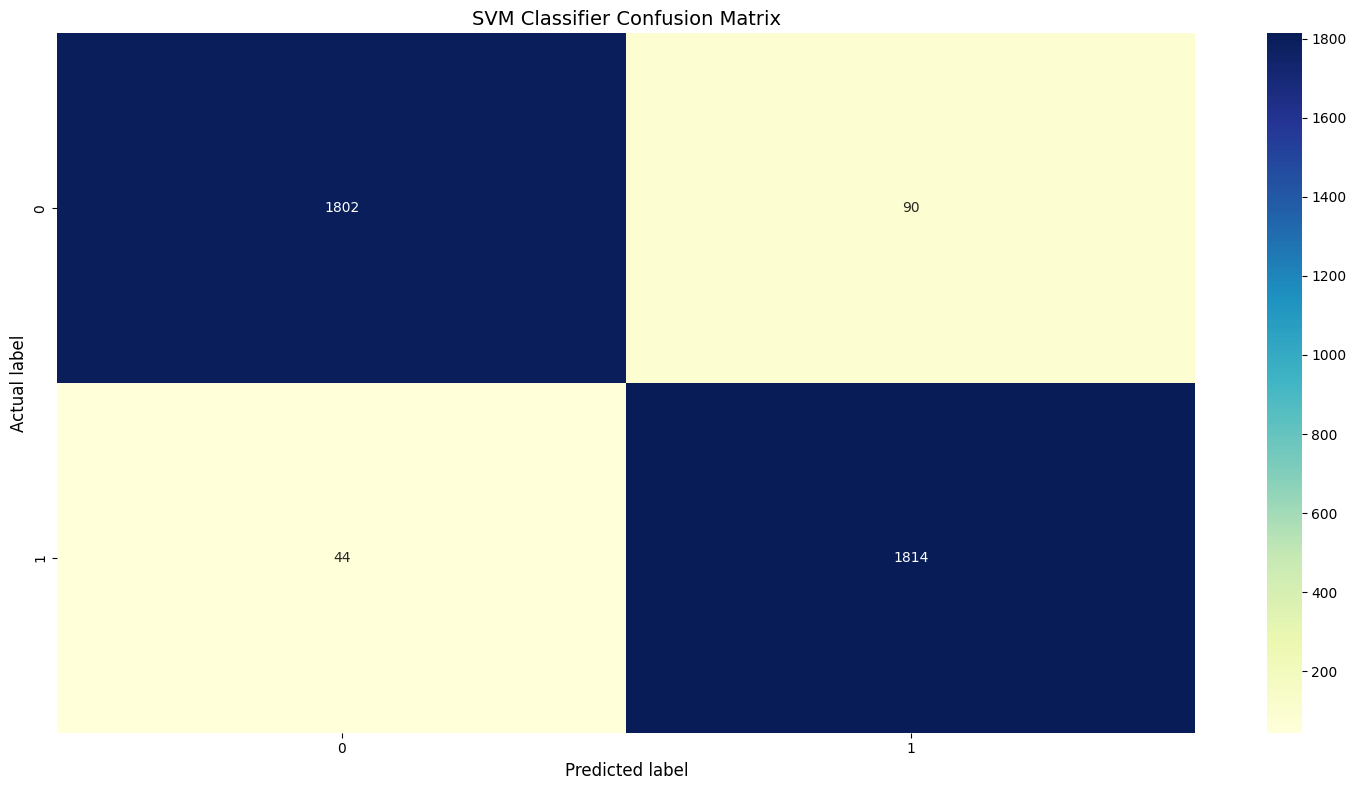

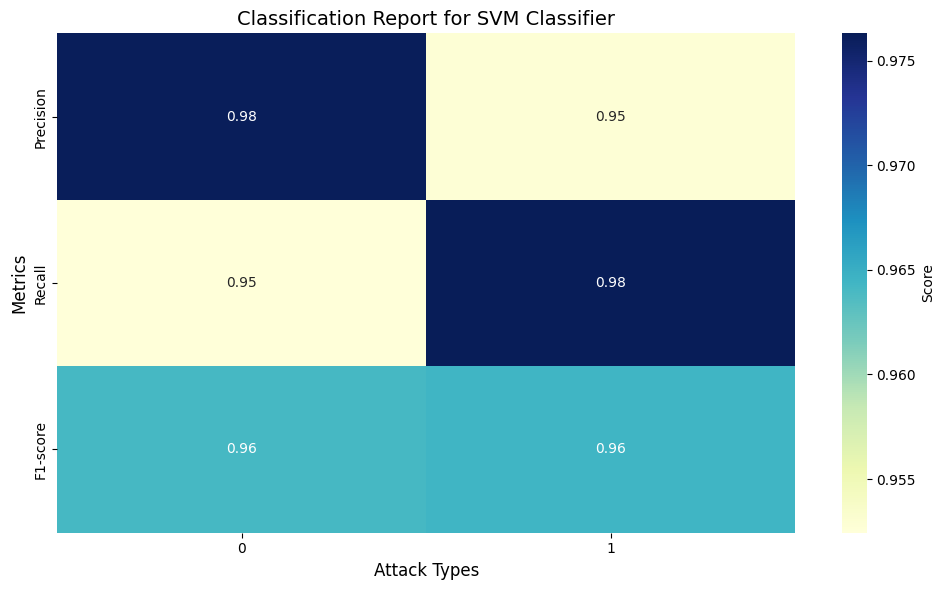

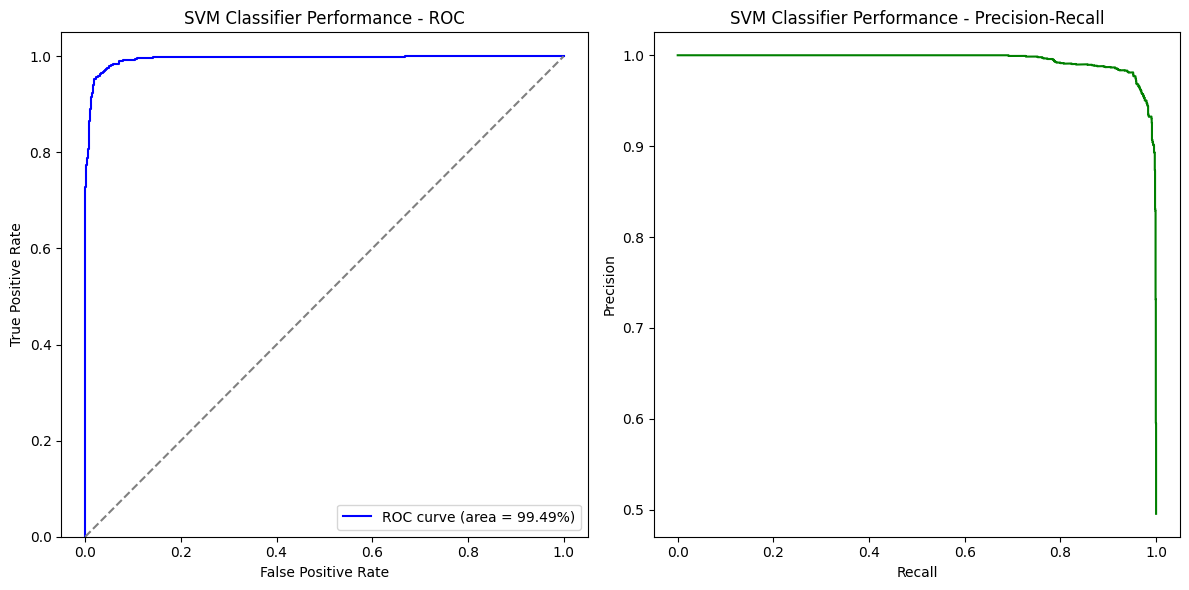


Cross-validation scores: [0.96044444 0.96266667 0.96088889 0.95777778 0.956     ]
Mean cross-validation score: 0.96


In [97]:
evaluate_model(svm_classifier, X_train_binc, X_test_binc, y_train_binc, y_test_binc, 'SVM Classifier', is_svm=True)

For SVM classifier,

The classification report showed the following: 
* Precision is high for both classes.   
* Recall is also high for both classes.
* The F1-Score is also high for both classes.
  
Overall, the SVM classifier exhibits excellent performance in both classes, with high precision, recall, and F1-scores.

The confusion matrix visually confirms that the high accuracy of the classifier. The diagonal elements (TP and TN) are much larger than the off-diagonal elements (FP and FN), indicating that the model is making correct predictions most of the time.

A higher AUC indicates better classifier performance. The provided AUC of 99% suggests that the SVM model is highly accurate in distinguishing between positive and negative classes.

A higher PR curve indicates better performance. The curve being closer to the top-right corner suggests a good balance between precision and recall for the SVM model.

##### **Decision Tree Classifier Model Evaluation**

Decision Tree - Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.94      0.94      0.94      1222
      botnet       0.99      0.99      0.99      1233
 brute_force       1.00      0.97      0.98      1193
        ddos       0.99      0.99      0.99      1304
         dos       0.98      0.97      0.97      1227
    portscan       0.98      0.99      0.99      1269
  web_attack       0.96      0.99      0.97      1302

    accuracy                           0.98      8750
   macro avg       0.98      0.97      0.98      8750
weighted avg       0.98      0.98      0.98      8750



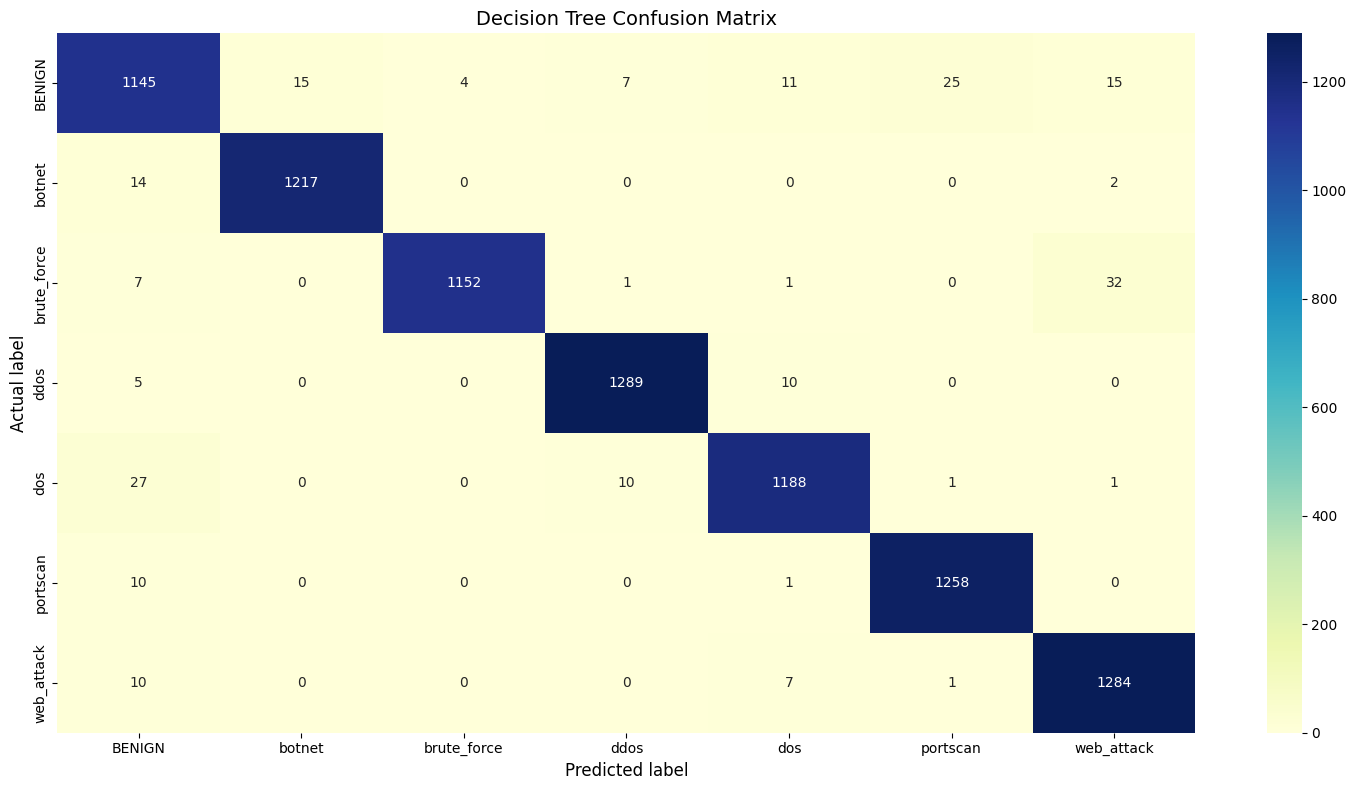

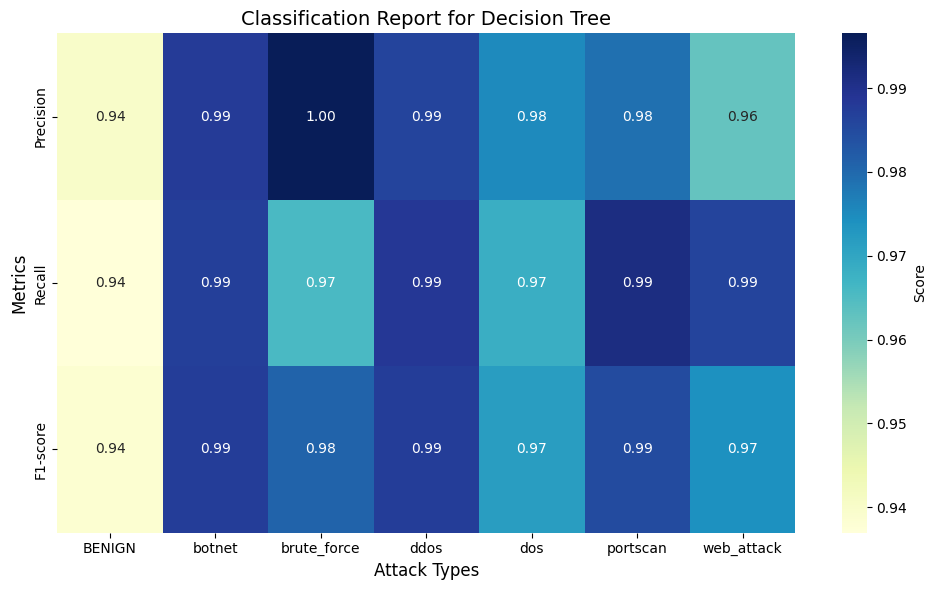


Cross-validation scores: [0.97504762 0.9767619  0.97409524 0.97390476 0.97371429]
Mean cross-validation score: 0.97


In [98]:
evaluate_model(decision_tree_classifier, X_train, X_test, y_train, y_test, 'Decision Tree')


For the decision tree,

* **Classification Report**: High precision, recall, and F1-scores across all attack types. The model is accurate in both identifying true positives and false positives. And is relatively balanced across different classes.

* **Confusion Matrix**: Strong diagonal dominance, minimal off-diagonal values, the model seems particularly accurate in classifying `ddos` and `portscan` attacks.

Overall, the decision tree classifier appears to be a highly effective model for this multi-class classification task. It exhibits strong performance across all metrics and is capable of accurately distinguishing between different attack types.

##### **Random Forest Model Evaluation**

Random Forest - Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.95      0.94      0.95      1222
      botnet       0.98      1.00      0.99      1233
 brute_force       1.00      0.98      0.99      1193
        ddos       0.99      0.99      0.99      1304
         dos       0.98      0.98      0.98      1227
    portscan       0.98      1.00      0.99      1269
  web_attack       0.98      0.99      0.99      1302

    accuracy                           0.98      8750
   macro avg       0.98      0.98      0.98      8750
weighted avg       0.98      0.98      0.98      8750



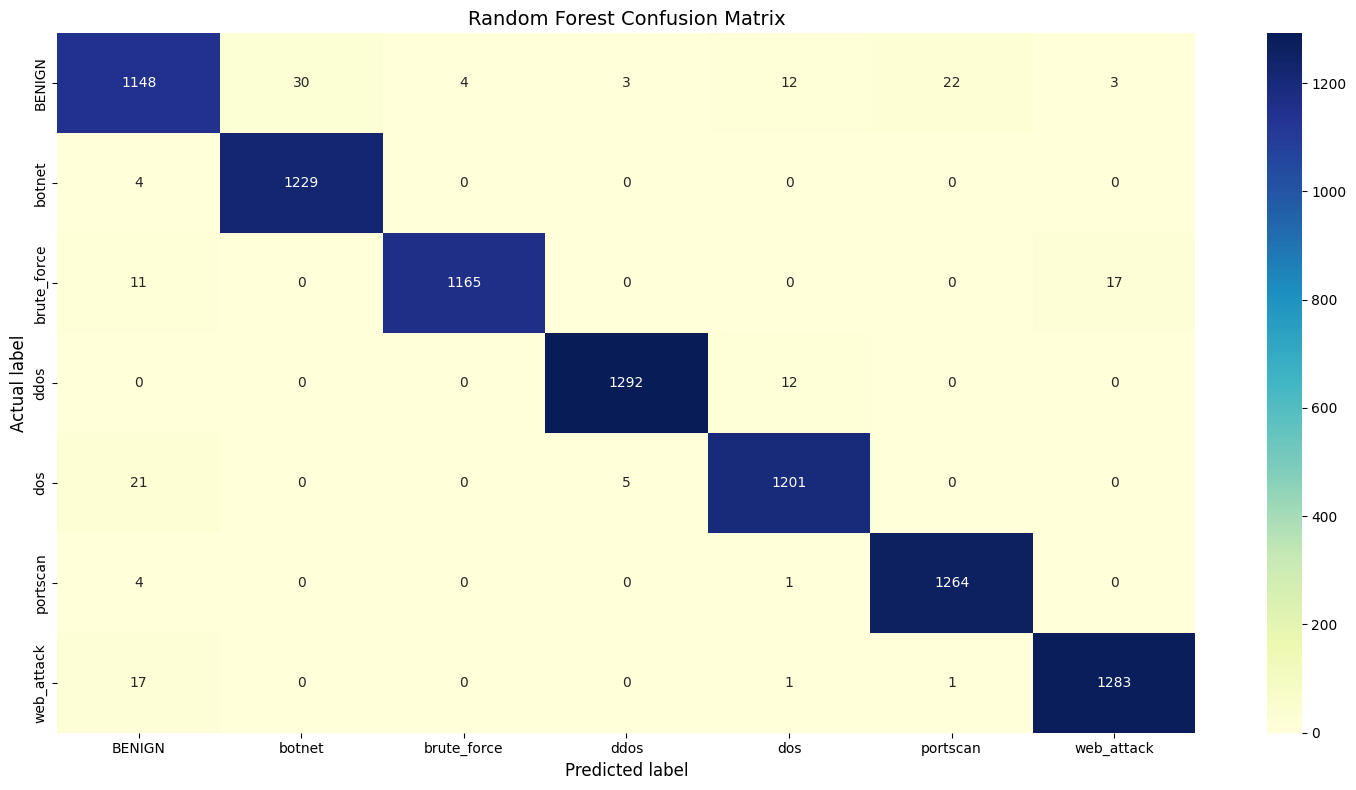

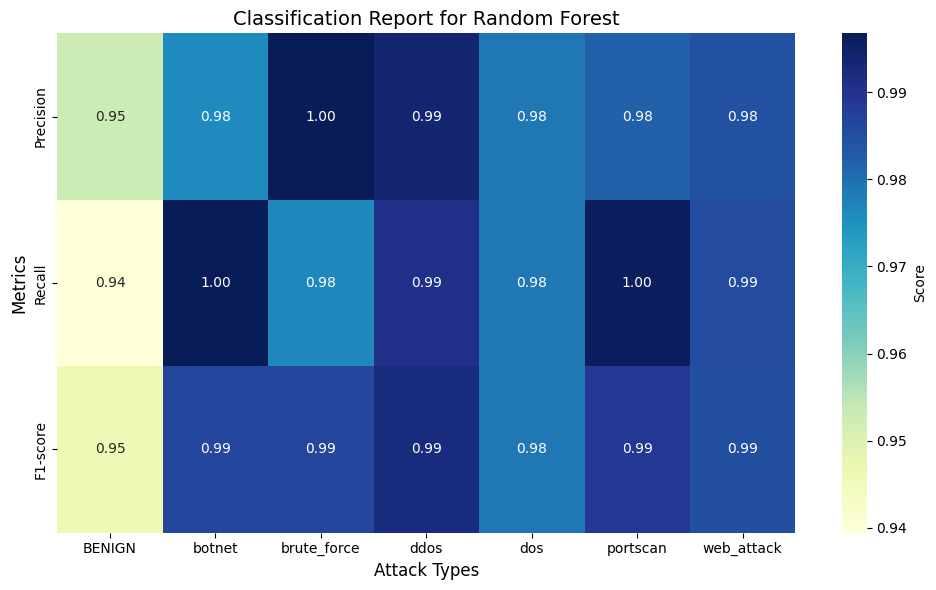


Cross-validation scores: [0.97961905 0.98190476 0.97828571 0.98380952 0.98019048]
Mean cross-validation score: 0.98


In [99]:
evaluate_model(randomforest_classifier, X_train, X_test, y_train, y_test, 'Random Forest')

For the Random Forest Classifier,

* **Confusion Matrix**: 
    * The high values along the diagonal indicate a high number of correct predictions for each class.
    * The low values off the diagonal suggest that the model rarely misclassifiees instances incorrectly.
    * The model also seems particularly accurate in classifying `ddos` and `portscan` attacks.

* **Classification Report**:
    * The model demonstrates strong performance across all attack types with high precision, recall, and F1-scores.
    * The metrics are relatively balanced.

Overall, the Random Forest classifier appears to be a highly effective model for this multi-class classification task.

##### **KNN and Random Forest Ensemble Model Evaluation**

KNN and Random Forest Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.98      0.94      0.96      1222
      botnet       0.97      1.00      0.99      1233
 brute_force       0.99      0.98      0.99      1193
        ddos       1.00      0.99      0.99      1304
         dos       0.98      0.99      0.99      1227
    portscan       0.98      1.00      0.99      1269
  web_attack       0.98      0.99      0.99      1302

    accuracy                           0.98      8750
   macro avg       0.98      0.98      0.98      8750
weighted avg       0.98      0.98      0.98      8750



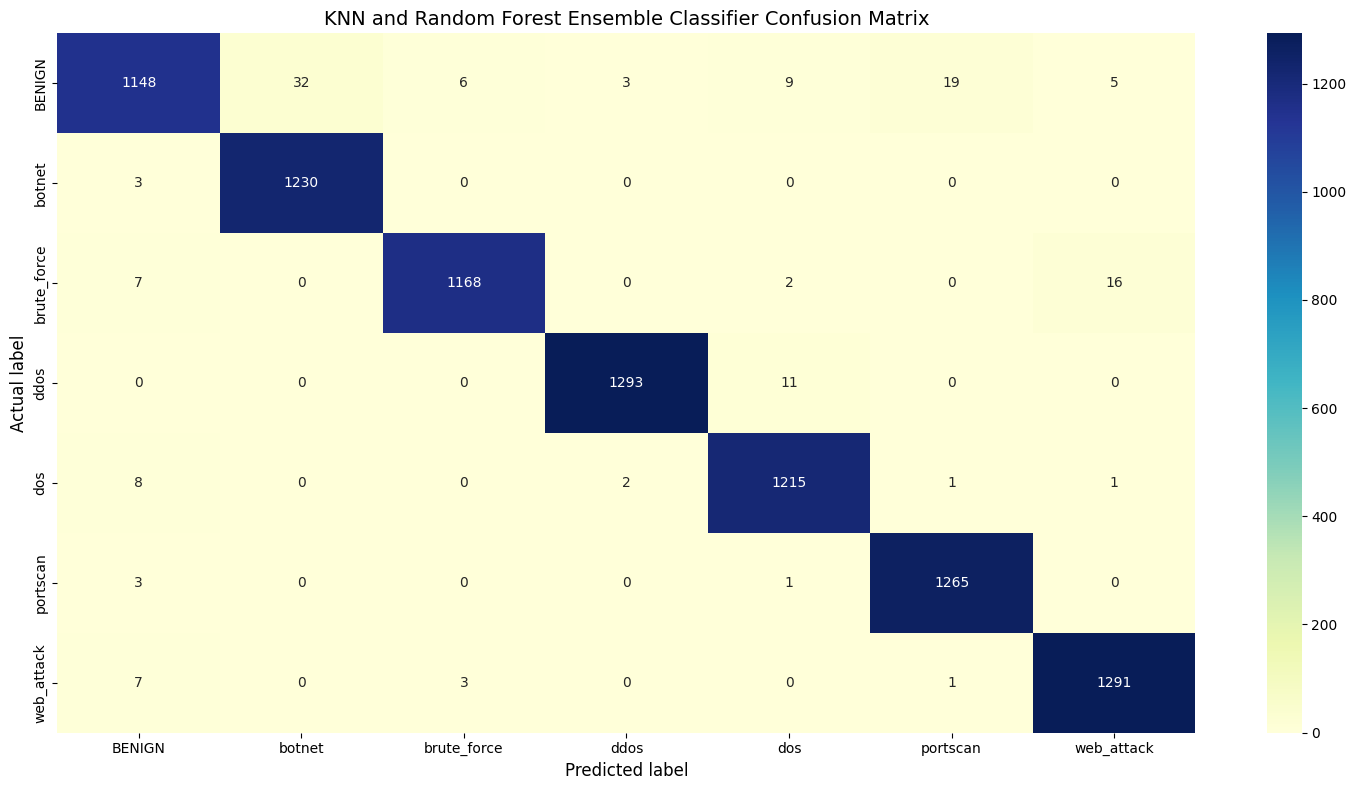

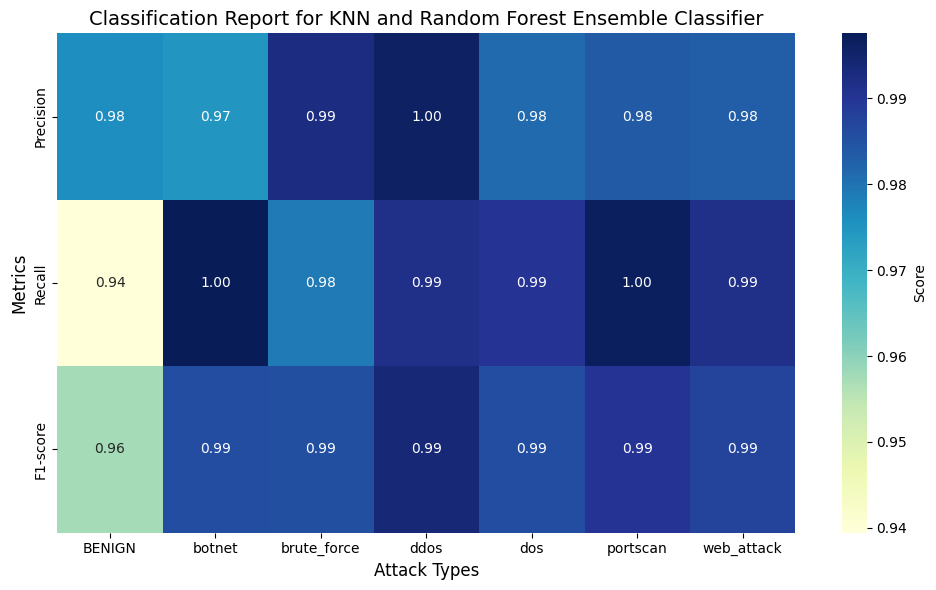


Cross-validation scores: [0.984      0.98609524 0.98095238 0.98361905 0.98095238]
Mean cross-validation score: 0.98


In [100]:
evaluate_model(voting_clf, X_train, X_test, y_train, y_test, 'KNN and Random Forest Ensemble Classifier')

For the KNN-Random Forest Ensemble Classifier,

The ensemble model combining KNN and Random Forest appears to be a strong performer, based on the provided visualizations. 

**Strengths of Ensemble Model**:
* **Improved Generalization**: Ensembles often reduce overfitting and improve generalization perofrmance by combining multiple models.
* **Enhanced accuracy**: The ensemble might achieve higher accuracy, especially in complex datasets with overlapping classes.
* **Reduced variance**: Combining diverse modelscan help to reduce the variance of predictions.

Both Random Forest and KNN-Random Forest Ensemble Classifier models exhibited strong performance.

**Random Forest**: 
* **Consistent performance**: The cross-validation scores indicate consisten performance across different folds.
* **High accuracy**: The mean cross validation socre of 0.98 suggests high accuracy.

**KNN-Random Forest Ensemble**:
* **Improved performance**: The ensemble model seems to slightly outperform the Random Forest in terms of the mean cross validation score.
* **Balanced performance**: The classification report shows high precision, recall, and F1-scores across all classes, suggesting balanced performance.

While both models are strong performers, the ensemble model appears to have a slight edge in terms of overall performance. However, it is important to consider factors like computational cost and interpretability when choosing between the two.

### **Conclusion**

* **Performance:** All models (`SVM`, `Decision Tree`, `Random Forest`, and `KNN-Random Forest Ensemble`) perform well, with mean scores between 96% and 98%.
* **Stability:** The `Decision Tree` and `Random Forest` models show very stable performance with minimal variance across the folds.
* **Random Forest:** The `Random Forest` model achieves the highest mean score of 98%, making it the best performing model in terms of classification accuracy.
* **Ensemble Advantage:** The `KNN and Random Forest Ensemble` slightly outperform the standalone Random Forest in some cases but provide similar overall performance.
* **Choice of Model:** If the goal is to maximize classification accuracy with minimal complexity, `Random Forest` would be the optimal choice. However, if interpretability is important or computational efficiency is a concern, `SVM` or `Decision Tree` may be considered as alternatives, though with slightly lower performance.

In conclusion, the Random Forest model stands out as the best-performing model, but the KNN-Random Forest Ensemble provides marginally better performance in certain folds, which highlights the potential of ensemble methods.

### **Saving Model Output**

In [101]:
'''# Saving SVM classifier
joblib.dump(svm_classifier, 'svm_classifier.pkl')

# Saving Decision Tree classifier
joblib.dump(decision_tree_classifier, 'decision_tree_classifier.pkl')

# Saving Random Forest classifier
joblib.dump(randomforest_classifier, 'randomforest_classifier.pkl')

# Saving KNN classifier
joblib.dump(knn_classifier, 'knn_classifier.pkl')

# Saving Voting Classifier (ensemble)
joblib.dump(voting_clf, 'voting_classifier.pkl')'''

"# Saving SVM classifier\njoblib.dump(svm_classifier, 'svm_classifier.pkl')\n\n# Saving Decision Tree classifier\njoblib.dump(decision_tree_classifier, 'decision_tree_classifier.pkl')\n\n# Saving Random Forest classifier\njoblib.dump(randomforest_classifier, 'randomforest_classifier.pkl')\n\n# Saving KNN classifier\njoblib.dump(knn_classifier, 'knn_classifier.pkl')\n\n# Saving Voting Classifier (ensemble)\njoblib.dump(voting_clf, 'voting_classifier.pkl')"